In [4]:
import requests
import numpy as np
import pandas as pd
import regex
import pycountry
import json
import matplotlib.pyplot as plt

# Formating dataset

In [2]:
dataset = pd.read_csv("data/KaggleOlympic2024.csv")
dataset.head(50)

,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality,nationality_long,nationality_code,birth_date,birth_place,birth_country,residence_place,residence_country,lang
0,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,21/10/1991,GYUMRI,Armenia,GYUMRI,Armenia,"Armenian, English, Russian"
1,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,22/01/1999,YEREVAN,Armenia,YEREVAN,Armenia,Armenian
2,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,21/12/1996,NaN,NaN,YEREVAN,Armenia,Armenian
3,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,22/11/1999,MASIS,Armenia,YEREVAN,Armenia,Armenian
4,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,27/10/1999,POKR VEDI,Armenia,NaN,Armenia,"Armenian, Russian"
5,ARENAS Lorena,ARENAS L,Lorena ARENAS,Female,Athlete,COL,Colombia,Colombia,Colombia,Colombia,COL,17/09/1993,PEREIRA,Colombia,MELBOURNE,Australia,Spanish
6,McKENZIE Ashley,McKENZIE A,Ashley McKENZIE,Male,Athlete,JAM,Jamaica,Jamaica,Jamaica,Jamaica,JAM,17/07/1989,LONDON,Great Britain,CAMBERLEY,Great Britain,English
7,BASS BITTAYE Gina Mariam,BASS BITTAYE GM,Gina Mariam BASS BITTAYE,Female,Athlete,GAM,Gambia,Gambia,Gambia,Gambia,GAM,03/05/1995,TUBAKUTA,Gambia,NaN,NaN,"English, French"
8,CAMARA Ebrahima,CAMARA E,Ebrahima CAMARA,Male,Athlete,GAM,Gambia,Gambia,Gambia,Gambia,GAM,18/09/1996,BUNDUNG,Gambia,ANGERS,France,"Arabic, English, French, Mandinka, Wolof"
9,RUEDA SANTOS Lizeth,RUEDA SANTOS L,Lizeth RUEDA SANTOS,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,07/03/1994,GUADALAJARA,Mexico,XALAPA,Mexico,Spanish


In [3]:
def split_name(full_name: str):
    tokens = full_name.strip().split()
    
    # Family name: ALL CAPS tokens
    family_tokens = [t for t in tokens if t.isupper()]
    
    # First name: everything else
    first_tokens = [t for t in tokens if not t.isupper()]
    
    return " ".join(family_tokens), " ".join(first_tokens)

# Apply to dataset
dataset[["familyName", "firstName"]] = dataset["name"].apply(
    lambda x: pd.Series(split_name(x))
)

dataset.head(50)

,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality,nationality_long,nationality_code,birth_date,birth_place,birth_country,residence_place,residence_country,lang,familyName,firstName
0,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,21/10/1991,GYUMRI,Armenia,GYUMRI,Armenia,"Armenian, English, Russian",ALEKSANYAN,Artur
1,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,22/01/1999,YEREVAN,Armenia,YEREVAN,Armenia,Armenian,AMOYAN,Malkhas
2,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,21/12/1996,NaN,NaN,YEREVAN,Armenia,Armenian,GALSTYAN,Slavik
3,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,22/11/1999,MASIS,Armenia,YEREVAN,Armenia,Armenian,HARUTYUNYAN,Arsen
4,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,27/10/1999,POKR VEDI,Armenia,NaN,Armenia,"Armenian, Russian",TEVANYAN,Vazgen
5,ARENAS Lorena,ARENAS L,Lorena ARENAS,Female,Athlete,COL,Colombia,Colombia,Colombia,Colombia,COL,17/09/1993,PEREIRA,Colombia,MELBOURNE,Australia,Spanish,ARENAS,Lorena
6,McKENZIE Ashley,McKENZIE A,Ashley McKENZIE,Male,Athlete,JAM,Jamaica,Jamaica,Jamaica,Jamaica,JAM,17/07/1989,LONDON,Great Britain,CAMBERLEY,Great Britain,English,,McKENZIE Ashley
7,BASS BITTAYE Gina Mariam,BASS BITTAYE GM,Gina Mariam BASS BITTAYE,Female,Athlete,GAM,Gambia,Gambia,Gambia,Gambia,GAM,03/05/1995,TUBAKUTA,Gambia,NaN,NaN,"English, French",BASS BITTAYE,Gina Mariam
8,CAMARA Ebrahima,CAMARA E,Ebrahima CAMARA,Male,Athlete,GAM,Gambia,Gambia,Gambia,Gambia,GAM,18/09/1996,BUNDUNG,Gambia,ANGERS,France,"Arabic, English, French, Mandinka, Wolof",CAMARA,Ebrahima
9,RUEDA SANTOS Lizeth,RUEDA SANTOS L,Lizeth RUEDA SANTOS,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,07/03/1994,GUADALAJARA,Mexico,XALAPA,Mexico,Spanish,RUEDA SANTOS,Lizeth


In [4]:
def findISOCode(country):
    if isinstance(country, str): # in case of missing values
        try:
            return pycountry.countries.search_fuzzy(country)[0].alpha_2
        except LookupError:
            return None  # if pycountry can't find a match
    else:
        return None
dataset["iso_country"] = dataset["birth_country"].apply(findISOCode)
dataset.head(50)

,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality,nationality_long,nationality_code,birth_date,birth_place,birth_country,residence_place,residence_country,lang,familyName,firstName,iso_country
0,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,21/10/1991,GYUMRI,Armenia,GYUMRI,Armenia,"Armenian, English, Russian",ALEKSANYAN,Artur,AM
1,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,22/01/1999,YEREVAN,Armenia,YEREVAN,Armenia,Armenian,AMOYAN,Malkhas,AM
2,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,21/12/1996,NaN,NaN,YEREVAN,Armenia,Armenian,GALSTYAN,Slavik,None
3,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,22/11/1999,MASIS,Armenia,YEREVAN,Armenia,Armenian,HARUTYUNYAN,Arsen,AM
4,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,27/10/1999,POKR VEDI,Armenia,NaN,Armenia,"Armenian, Russian",TEVANYAN,Vazgen,AM
5,ARENAS Lorena,ARENAS L,Lorena ARENAS,Female,Athlete,COL,Colombia,Colombia,Colombia,Colombia,COL,17/09/1993,PEREIRA,Colombia,MELBOURNE,Australia,Spanish,ARENAS,Lorena,CO
6,McKENZIE Ashley,McKENZIE A,Ashley McKENZIE,Male,Athlete,JAM,Jamaica,Jamaica,Jamaica,Jamaica,JAM,17/07/1989,LONDON,Great Britain,CAMBERLEY,Great Britain,English,,McKENZIE Ashley,GB
7,BASS BITTAYE Gina Mariam,BASS BITTAYE GM,Gina Mariam BASS BITTAYE,Female,Athlete,GAM,Gambia,Gambia,Gambia,Gambia,GAM,03/05/1995,TUBAKUTA,Gambia,NaN,NaN,"English, French",BASS BITTAYE,Gina Mariam,GM
8,CAMARA Ebrahima,CAMARA E,Ebrahima CAMARA,Male,Athlete,GAM,Gambia,Gambia,Gambia,Gambia,GAM,18/09/1996,BUNDUNG,Gambia,ANGERS,France,"Arabic, English, French, Mandinka, Wolof",CAMARA,Ebrahima,GM
9,RUEDA SANTOS Lizeth,RUEDA SANTOS L,Lizeth RUEDA SANTOS,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,07/03/1994,GUADALAJARA,Mexico,XALAPA,Mexico,Spanish,RUEDA SANTOS,Lizeth,MX


In [5]:
dataset.to_csv(path_or_buf="data\KaggleOlympic2024Formatted.csv")

<>:1: SyntaxWarning: invalid escape sequence '\K'
<>:1: SyntaxWarning: invalid escape sequence '\K'
C:\Users\brief\AppData\Local\Temp\ipykernel_17396\2989165706.py:1: SyntaxWarning: invalid escape sequence '\K'
  dataset.to_csv(path_or_buf="data\KaggleOlympic2024Formatted.csv")


# Exploring dataset

In [2]:
dataset = pd.read_csv("data\KaggleOlympic2024Formatted.csv")

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 11113 non-null  int64 
 1   name               11113 non-null  object
 2   name_short         11110 non-null  object
 3   name_tv            11110 non-null  object
 4   gender             11113 non-null  object
 5   function           11113 non-null  object
 6   country_code       11113 non-null  object
 7   country            11113 non-null  object
 8   country_long       11113 non-null  object
 9   nationality        11110 non-null  object
 10  nationality_long   11110 non-null  object
 11  nationality_code   11110 non-null  object
 12  birth_date         11113 non-null  object
 13  birth_place        8727 non-null   object
 14  birth_country      9475 non-null   object
 15  residence_place    6804 non-null   object
 16  residence_country  8288 non-null   objec

<>:1: SyntaxWarning: invalid escape sequence '\K'
<>:1: SyntaxWarning: invalid escape sequence '\K'
C:\Users\brief\AppData\Local\Temp\ipykernel_5984\2916071592.py:1: SyntaxWarning: invalid escape sequence '\K'
  dataset = pd.read_csv("data\KaggleOlympic2024Formatted.csv")


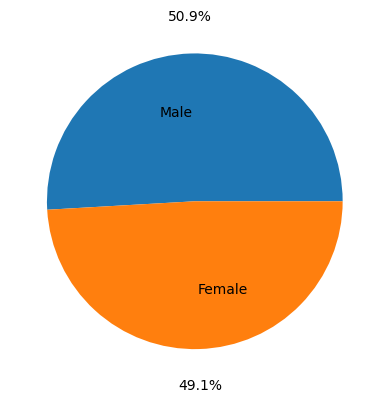

In [10]:
n_genders = dataset["gender"].value_counts()
genders = dataset["gender"].unique()

fig, ax = plt.subplots()
ax.pie(n_genders, labels=genders, autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.6)
plt.show()

# Testing tools
| NomOutil     | Type       |
|--------------|------------|
| genderize.io | Online API |
| Gender       | R Package  |
| GenderAPI    | Online API |
| GenderGuesser| Python     |
| NamSor       | Online API |
| NameAPI      | Online API |

## Testing genderize.io

In [12]:
dataset = pd.read_csv("data\KaggleOlympic2024Formatted.csv")
dataset.columns

<>:1: SyntaxWarning: invalid escape sequence '\K'
<>:1: SyntaxWarning: invalid escape sequence '\K'
C:\Users\brief\AppData\Local\Temp\ipykernel_17396\412251042.py:1: SyntaxWarning: invalid escape sequence '\K'
  dataset = pd.read_csv("data\KaggleOlympic2024Formatted.csv")


Index(['id', 'name', 'name_short', 'name_tv', 'gender', 'function',
       'country_code', 'country', 'country_long', 'nationality',
       'nationality_long', 'nationality_code', 'birth_date', 'birth_place',
       'birth_country', 'residence_place', 'residence_country', 'lang',
       'familyName', 'firstName', 'iso_country'],
      dtype='object')

In [7]:
#base
for name in dataset.head()["firstName"]:
    response = requests.get(f"https://api.genderize.io?name={name}")
    print(response.text)

{"count":138242,"name":"Artur","gender":"male","probability":1.0}
{"count":3,"name":"Malkhas","gender":"male","probability":1.0}
{"count":2018,"name":"Slavik","gender":"male","probability":0.99}
{"count":10342,"name":"Arsen","gender":"male","probability":0.99}
{"count":398,"name":"Vazgen","gender":"male","probability":0.98}


In [ ]:
# with country
for index, row in dataset.head(1).iterrows():
    name = row["firstName"]
    country = row["iso_country"]
    if isinstance(country, str): #working with country if available 
        response = requests.get(f"https://api.genderize.io?name={name}&country_id={country}")
        print(json.loads(response.text).get("gender"))
    else:
        response = requests.get(f"https://api.genderize.io?name={name}")
        print(json.loads(response.text).get("gender"))

male


When working with countries, there may be problem if the combo name + country leads to a very low/inexistant count. genderize.io does NOT have any protection for that, so even tho they may have the name in their database somewhere, they might still not have the combo name+country anywhere, thus returning a great and grand "0 null nada we don't know jack about it" answers, which messes up answers. 

Two solutions opens up : 
- We never use country to avoid this problem all together.
- We use country, get potentially messy answers and record the count we got. Then, we do a second pass without country for all answers that had low/0 count. 

## Testing gender API 